In [ ]:
## 繪製資料集，並且儲存到資料夾中

![](note_img/complete_visualize.png)

In [2]:
# 繪製切割後的資料集

from dataloader.heart_calcification.research_tool import *
from dataloader.heart_calcification.heart_calcification_results_display import *

data_processor = get_data_processor()

# 获取数据字典
data_dict = data_processor.get_data_dict()

# 想保存可视化结果的目录
save_dir = f'D://Paper/RGB_SFM/data/HeartCalcification/visual_test'

#'contrast' 'normalize' 'histogram_equalization' 'scale_and_offset' 'clahe' 'none'
# enhance_method = 'scale_and_offset'
#  可視化數據集並保存為圖片
visualize_dataset(data_dict, save_dir, data_dir, enhance_method, grid_size, resize_height, 
                  draw_calcification = False, mask_with_vessel = False)

# 顯示類別的數量
data_processor.display_label_counts()

數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00001_1275_LAD_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00004_1350_LAD_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00004_1352_LAD_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00004_1354_D1_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00004_1356_LCX_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00004_1358_RCA+PLB_8.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00009_1259_LAD1_12.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00009_1261_LAD2_12.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00009_1263_LAD3_12.png_dataset.png
數據集圖像已保存到: D://Paper/RGB_SFM/data/HeartCalcification/visual_test\CV00010_1372_RCA@NT_8.png_

# 繪製資料集，小張圖片組成的大圖片
![](note_img/split_img.png)

In [4]:
from dataloader.heart_calcification.research_tool import *
from dataloader.heart_calcification.heart_calcification_results_display import *

def merge_images_with_spacing(images, rows, cols, spacing=10):
    # 假設所有圖片的大小是一樣的
    img_height, img_width = images[0].shape

    # 計算合併圖片的總高度和寬度（包括空格）
    total_height = img_height * rows + spacing * (rows - 1)
    total_width = img_width * cols + spacing * (cols - 1)

    # 創建一個大的空白圖像來放置圖片，並填充黑色作為背景
    merged_image = np.zeros((total_height, total_width), dtype=np.uint8)

    # 將每一張圖片放置在合適的位置，並在圖片之間留出空格
    for idx, img in enumerate(images):
        row = idx // cols
        col = idx % cols

        # 計算每張圖片應該放置的起始位置（包括空格）
        start_y = row * (img_height + spacing)
        start_x = col * (img_width + spacing)

        # 將圖片放入合併圖像中
        merged_image[start_y:start_y + img_height, start_x:start_x + img_width] = img

    return merged_image

def save_images_by_label(data_processor: HeartCalcificationDataProcessor):
    # 創建一個字典來存儲每個標籤的圖片
    label_images = {0: [], 1: []}

    dataset = data_processor.get_model_ready_data()

    for idx in range(len(dataset)):
        key, img, label = dataset[idx]

        label_images[label].append(img)
    
    print(len(label_images[0]))
    print(len(label_images[1]))
    
    # 保存圖片到指定的目錄
    for label, images in label_images.items():
        label_save_dir = os.path.join(save_dir, f'label_{label}')
        if not os.path.exists(label_save_dir):
            os.makedirs(label_save_dir)
        
        # 每次處理 100 張圖片並合併
        num_images = len(images)
        img_counter = 0  # 用於記錄合併圖片的編號

        for i in range(0, num_images, 100):
            # 取下一批最多 100 張圖片
            batch_images = images[i:i + 100]
            if len(batch_images) < 100:
                # 不足 100 張的情況下，可能是最後一批，填充成 10x10 的網格
                # 假設用全黑的圖片來補充不足的部分
                empty_image = np.zeros_like(batch_images[0])
                while len(batch_images) < 100:
                    batch_images.append(empty_image)

            # 合併 10x10 的圖片，並在圖片之間留出空格（例如 10 像素）
            merged_image = merge_images_with_spacing(batch_images, 10, 10, spacing=10)

            # 保存合併後的大圖片
            img_path = os.path.join(label_save_dir, f'merged_image_{img_counter}.png')
            Image.fromarray(merged_image).save(img_path)  # 保存圖片
            print(f"已保存合併圖片: {img_path}")

            img_counter += 1  # 更新圖片編號



# 儲存路徑
save_dir = f"D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_{enhance_method}"


data_processor = get_data_processor()

# 執行保存圖片的函數
save_images_by_label(data_processor)

5905
555
已保存合併圖片: D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_none\label_0\merged_image_0.png
已保存合併圖片: D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_none\label_0\merged_image_1.png
已保存合併圖片: D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_none\label_0\merged_image_2.png
已保存合併圖片: D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_none\label_0\merged_image_3.png
已保存合併圖片: D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_none\label_0\merged_image_4.png
已保存合併圖片: D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_none\label_0\merged_image_5.png
已保存合併圖片: D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_none\label_0\merged_image_6.png
已保存合併圖片: D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_none\label_0\merged_image_7.png
已保存合併圖片: D://Paper/RGB_SFM/data/HeartCalcification/enhance_test/split_data_none\label_0\merged_image_8.png
已保存合併圖片: D://Paper/RGB_SFM/d

# 測試準確度

In [11]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import numpy as np

from config import config, arch
from dataloader import get_dataloader
from dataloader.heart_calcification.research_tool import *

def load_dataloader():
    return get_dataloader(dataset=config['dataset'], root=config['root'] + '/data/',
                          batch_size=config['batch_size'], input_size=config['input_shape'])

def predict(model, dataloader):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in dataloader:
            print(images.shape)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.argmax(dim=1).cpu().numpy())
    return all_preds, all_labels

def plot_confusion_matrix(pred_labels, true_labels):
    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    




<class 'dataloader.HeartCalcification.HeartCalcificationColor'>
172
model data count :  880
Label: -1, Count: 100095
Label: 0, Count: 5539
Label: 1, Count: 440
46
model data count :  190
Label: -1, Count: 18941
Label: 0, Count: 1296
Label: 1, Count: 95
torch.Size([190, 3, 45, 45]) torch.Size([190, 2])
triangle
cReLU_percent
cReLU_percent
cReLU_percent
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        RGB_Conv2d-1           [-1, 30, 45, 45]              90
          triangle-2           [-1, 30, 45, 45]               0
     cReLU_percent-3           [-1, 30, 45, 45]               0
               SFM-4           [-1, 30, 45, 45]               0
        RBF_Conv2d-5            [-1, 225, 9, 9]         168,750
     cReLU_percent-6            [-1, 225, 9, 9]               0
               SFM-7            [-1, 225, 3, 3]               0
        RBF_Conv2d-8            [-1, 625, 3, 3]         140,625
     

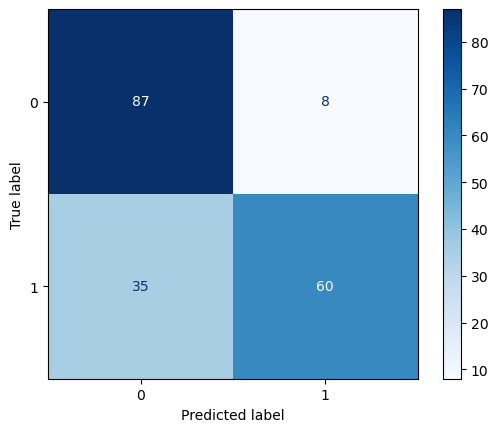

In [10]:
from load_tools import load_model_and_data

# 主程序
# 1️⃣ 讀取模型與資料
checkpoint_filename = config["load_model_name"]
test_data = False # 測試模型準確度
model, train_dataloader, test_dataloader, images, labels = load_model_and_data(checkpoint_filename, test_data=test_data)


In [12]:
pred_labels, true_labels = predict(model, test_dataloader)
plot_confusion_matrix(pred_labels, true_labels)

torch.Size([190, 3, 45, 45])


TypeError: 'NoneType' object is not callable

# 繪製結果到預測的圖片

In [20]:
from load_tools import load_model_and_data

# 主程序
# 1️⃣ 讀取模型與資料
checkpoint_filename = config["load_model_name"]
test_data = False # 測試模型準確度
model, train_dataloader, test_dataloader, images, labels = load_model_and_data(checkpoint_filename, test_data=test_data)

data_dir = "D://Paper/RGB_SFM/data/HeartCalcification/basic"  # 请替换为您的数据目录
save_dir = f'D://Paper/RGB_SFM/data/HeartCalcification/predict'


<class 'dataloader.HeartCalcification.HeartCalcificationColor'>
172
model data count :  880
Label: -1, Count: 100095
Label: 0, Count: 5539
Label: 1, Count: 440
46
model data count :  190
Label: -1, Count: 18941
Label: 0, Count: 1296
Label: 1, Count: 95
torch.Size([190, 3, 45, 45]) torch.Size([190, 2])
triangle
cReLU_percent
cReLU_percent
cReLU_percent
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
        RGB_Conv2d-1           [-1, 30, 45, 45]              90
          triangle-2           [-1, 30, 45, 45]               0
     cReLU_percent-3           [-1, 30, 45, 45]               0
               SFM-4           [-1, 30, 45, 45]               0
        RBF_Conv2d-5            [-1, 225, 9, 9]         168,750
     cReLU_percent-6            [-1, 225, 9, 9]               0
               SFM-7            [-1, 225, 3, 3]               0
        RBF_Conv2d-8            [-1, 625, 3, 3]         140,625
     

In [21]:
from dataloader.heart_calcification.heart_calcification_results_display import *
from typing import List, Tuple, Any, Dict
from dataloader.heart_calcification.heart_calcification_data_processor import HeartCalcificationDataProcessor
import numpy as np
from dataloader.heart_calcification.image_split_data import ImageSplitData

def predict(model: Any, data_processor: HeartCalcificationDataProcessor) -> List[Tuple[ImageSplitData, Dict[tuple, int], Dict[tuple, int]]]:
    """
    使用给定的模型对心脏钙化数据进行预测。

    参数:
    model: 用于预测的机器学习模型
    data_processor: HeartCalcificationDataProcessor 实例,包含处理后的数据

    返回:
    List[Tuple[str, List[int], List[int]]]: 预测结果列表,每个元素为 (imageName, true_labels, predicted_labels)
    """

    results = []
    for image_name, image_data in data_processor.data_dict.items():
        images = handle_images(image_data.get_vessel_split_images().values())
        # print(len(images))
        # print(image_name)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        # print(preds)
        
        pred_dict = {}
        counter = 0
        for key, label in image_data.get_vessel_labels().items():
            pred_dict[key] = preds[counter].item()
            counter += 1
        
        results.append((image_data, image_data.get_vessel_labels(), pred_dict))

    return results


def handle_images(split_images):   
    print(f"1: {split_images}")
    # 將 List[np.ndarray] 轉換為 np.ndarray
    processed_images = np.array([torch.from_numpy(img).float() / 255.0 for img in split_images])  # 將 np.ndarray 轉換為張量
    print(f"1: {processed_images.shape}")
    processed_images = np.expand_dims(processed_images, axis=1) # 增加一個維度，變為 (*, 1, 45, 45)
    print(f"3: {processed_images.shape}")
    processed_images = torch.from_numpy(processed_images)
    print(f"4: {processed_images.shape}")
    
    processed_images = processed_images.repeat(1, 3, 1, 1)  # 從 (*, 1, 45, 45) 擴展為 (*, 3, 45, 45)
    print(f"2: {processed_images.shape}")
    
    return processed_images  # 返回修改完的 split_images

results = predict(model, data_processor)

visualize_predict(results, data_dir, save_dir,  grid_size, resize_height, use_vessel_mask)

1: dict_values([array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 139, 149, 157],
       [  0,   0,   0, ..., 151, 159, 166],
       [  0,   0,   1, ..., 163, 170, 175]], dtype=uint8), array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [165, 173, 179, ..., 190, 189, 188],
       [173, 178, 182, ..., 188, 188, 189],
       [180, 182, 185, ..., 188, 188, 191]], dtype=uint8), array([[  0,   2,   5, ..., 174, 179, 180],
       [  7,   8,  10, ..., 182, 184, 184],
       [ 16,  15,  16, ..., 188, 187, 186],
       ...,
       [ 14,  19,  31, ...,   6,   5,   8],
       [ 19,  25,  38, ...,   7,   7,  10],
       [ 24,  31,  44, ...,  10,  10,  13]], dtype=uint8), array([[182, 183, 186, ..., 191, 191, 193],
       [183, 184, 186, ..., 194, 195, 196],
       [187, 187, 187, 